
1. Add (detailed) comments the python code below which computes the time dependence of position and velocity for the simple harmonic oscillator (e.g., mass on a spring) using the Euler method.  Feel free to modify the code to your liking!   

2. Compute the total energy $E^n$ per unit mass at each time step, $t^n$.  Compute the time dependence of the difference 

$$ \Delta^n = \frac{E^n - E^0}{E^0}$$

for *at least* one complete cycle and plot $\Delta^n$ as a function of time.  Is the difference $\Delta^n$ uniformly small throughout the cycle?  What are the units of $k$?


In [1]:
# Simple harmonic oscillator.
import numpy as np
from matplotlib import pyplot as plt
#---------------------------------------------------------------------------------------------------------------------------
omega2 = 9                    #omega^2 = (k/m) (k= spring constant,m = mass)
T = 3*np.pi/np.sqrt(omega2)   #Period(?) (But why 3pi?)(units = seconds (I assume))
dt = 0.01*T                   #time step, in relation to period
x0 = 1.0                      #Initial position (displacement from equilibrium position?) (units=meters?)
v0 = 0.0                      #Initial velocity


def SHO(x0,v0,omega2,T,dt):      #Simple Harmonic Oscillator (outputs, array of position, vel., and time of 2 periods)
    x = []                       #position (disp. from equi. position?)
    v = []                       #velocity
    time = []
    t = 0.0                      #initial time
    tfinal = 2*T                 #ends after two periods
    while t < tfinal:
        time.append(t)
        x.append(x0)
        v.append(v0)
        vp = v0 - omega2*x0*dt   #derived from Newton's equation of motion
        x0 = x0 + v0*dt
        v0 = vp
        t = t+dt
    return x, v, time



[x,v,time] = SHO(x0,v0,omega2,T,dt)

#Graphing
plt.figure(1)
plt.plot(time,x)
plt.title("Position vs. Time")
plt.xlabel('time')
plt.ylabel('position')
plt.figure(2)
plt.title("Velocity vs. Time")
plt.plot(time,v)
plt.xlabel('time')
plt.ylabel('velocity')

Text(0, 0.5, 'velocity')

Text(0, 0.5, 'Energy Difference')

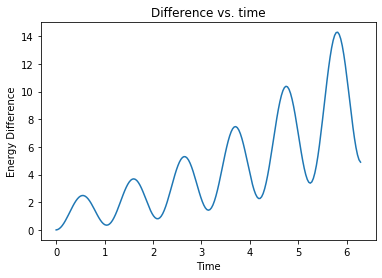

In [2]:
#Computing total energy
om = np.sqrt(omega2)                       #setting omega (so I don't have to keep typing np.sqrt(omega2))
k=-(v[1]-v[0])/(om*x[0]*(time[1]-time[0])) #spring constant (k) (units = sec^-2(?))


def energy(v,x,omega2,k):                  #Total energy
    return ((k/om)*(v**2) + k*(x**2))/2

E = []                                     #Total energy array
dif = []                                   #Difference in energy array
for i in range(0,len(time)):
    xi = x[i]
    vi = v[i]
    Ep = energy(v[i],x[i],omega2,k)
    E.append(Ep)
    d = (E[i]-E[0])/E[0]                   #The difference of energy between initial and at a certain time step
    dif.append(d)

#Graphing difference  
plt.plot(time,dif)
plt.title("Difference vs. time")
plt.xlabel("Time")
plt.ylabel("Energy Difference")

No, the difference $\Delta^n$ is not uniformly small throughout the cycle(s). (At least for the difference between the initial energy and the energy at a certain time step. The difference of energy between timestep $n$ and $n-1$ was a bit more uniform, and small, but in terms of conservation of energy that still not a good thing.)

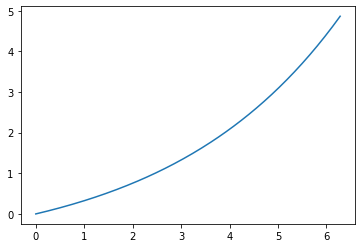

In [3]:
E0_下m =(0.5)*omega2*(x0**2)

E = []                                     #Total energy array
dif = []                                   #Difference in energy array
for i in range(0,len(x)):
    Eom = (0.5)*v[i]**2 + (0.5)*omega2*(x[i]**2)
    E.append(Eom)
    d = (E[i]-E0_下m)/E0_下m                   #The difference of energy between initial and at a certain time step
    dif.append(d)


[x,v,time] = SHO(x0,v0,omega2,T,dt)

plt.plot(time,dif)
